In [151]:
import requests
import json
import pandas as pd

api_key = "XXXX"

lat = "-39.39"
lon = "76.16"
city = 'Jackson' #city id: 4347778

url = "https://api.openweathermap.org/data/2.5/onecall?lat=%s&lon=%s&appid=%s&units=imperial" % (lat, lon, api_key)
# url = "https://api.openweathermap.org/data/2.5/weather?q=%s&appid=%s&units=imperial" % (city, api_key)

response = requests.get(url)
data = json.loads(response.text)
print(data['current']['temp'])


54.28


In [64]:
## works for querying baltimore
# print(data['main']['temp'])
# print("The temperature is " , data['main']['temp'], "degrees farenheit")

## works for querying temperature from lat/lon
print("The temperature is " , data['current']['temp'], 'degrees farenheit')

The temperature is  55.04 degrees farenheit


In [172]:
import pandas as pd
import matplotlib.pyplot as plt

## This function returns the latitude, longitude, and current temperature based on a city input
## it uses the apen weather map API to get this data
def get_data(city, api_key = "9d8724e5d5e9bb1af6a56f29d565efc2"):
    url = "https://api.openweathermap.org/data/2.5/weather?q=%s&appid=%s&units=imperial" % (city, api_key)
    
    response = requests.get(url)
    data = json.loads(response.text)
    
    return [data['coord']['lat'] , data['coord']['lon'], data['main']['temp']]

## This function returns the current temperature for a given lat/lon input
def get_temp(lat,lon, api_key = "9d8724e5d5e9bb1af6a56f29d565efc2"):
    url = "https://api.openweathermap.org/data/2.5/onecall?lat=%s&lon=%s&appid=%s&units=imperial" % (lat, lon, api_key)

    response = requests.get(url)
    data = json.loads(response.text)
    return [data['current']['temp']]

# These are the cities we're going to use
city_names = ['Baltimore',\
              'New York',\
              'Miami',\
              'San Diego',\
              'Seattle',\
              'Minneapolis',\
              'Atlanta',\
              'Las Vegas',\
              'Austin',\
              'Jackson',\
              'Colorado',\
              'Louisville',\
              'Honolulu',\
              'Fairbanks',\
              'San Juan',\
              'Juneau',\
              'Bangor',\
              'Los Angeles',\
              'San Francisco',\
              'Detroit',\
              'El Paso',\
              'Fargo'\
             ]

city_info = []
for i in city_names:
    #getting data
    lat=  get_data(i)[0]
    lon = get_data(i)[1]
    current_temp = get_data(i)[2]
    opposite_temp = get_temp(-lat,-lon)[0] # negative values of \
        #lat and lon represent the values on the other side of the world
    #creating list to structure data, before converting to dataframe
    temp_delta = current_temp - opposite_temp
    city_info.append( 
        {
            'City': i,
            'Lat': lat,
            'Lon': lon,
            'Current Temp': current_temp,
            'Temp on Opposite Side of the World': opposite_temp,
            'Temperature Difference': temp_delta
        }
    )
city_info_df = pd.DataFrame(city_info)
        
city_info_df.head(50)



,City,Lat,Lon,Current Temp,Temp on Opposite Side of the World,Temperature Difference
0,Baltimore,39.29,-76.61,51.91,54.32,-2.41
1,New York,40.71,-74.01,60.40,52.41,7.99
2,Miami,25.77,-80.19,82.06,68.76,13.30
3,San Diego,32.72,-117.16,73.42,59.63,13.79
4,Seattle,47.61,-122.33,57.25,47.35,9.90
5,Minneapolis,44.98,-93.26,59.23,44.67,14.56
6,Atlanta,33.75,-84.39,60.84,56.93,3.91
7,Las Vegas,36.17,-115.14,81.00,57.00,24.00
8,Austin,30.27,-97.74,72.54,63.70,8.84
9,Jackson,42.42,-122.83,68.20,50.27,17.93


<function matplotlib.pyplot.show(*args, **kw)>

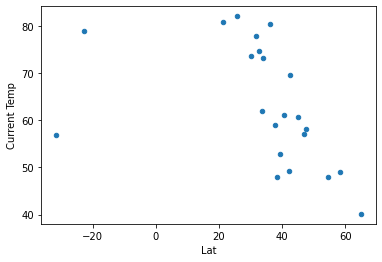

In [169]:
import matplotlib.pyplot as plt
city_info_df.plot(kind = 'scatter' , x = 'Lat' , y = 'Current Temp')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

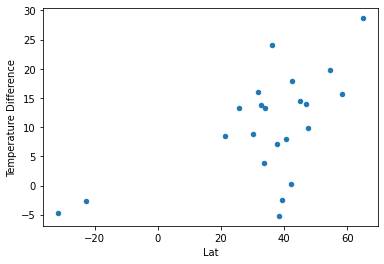

In [173]:
import matplotlib.pyplot as plt
city_info_df.plot(kind = 'scatter' , x = 'Lat' , y = 'Temperature Difference')
plt.show